# Problem definition
This notebook looks into various python machine learning libraries in order to develop a ML model which can predict wether a person is having heart diesease or not based on there current medical attributes
# We are going to take the following aprroach
1. Problem definition
2. Data 
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1) Problem Definition
Given clinical data can we predict wether a person is having a heart disease or not
## 2) Data
1. The original data came from cleveland UCI Machine Learning Repo
https://archive.ics.uci.edu/ml/datasets/heart+disease
2. There is also a version of it available on kaggle
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3)Evaluation
Achieve atleast 95% accuracy to launch this model

## 4)Features
#### Data Dictionary(To help us understand more about the data)
** Create DATADICT **
   * age - age in years
   * sex - (1 = male; 0 = female)
   * cp - chest pain type
    *    0: Typical angina: chest pain related decrease blood supply to the heart
     *   1: Atypical angina: chest pain not related to heart
      *  2: Non-anginal pain: typically esophageal spasms (non heart related)
       * 3: Asymptomatic: chest pain not showing signs of disease
    * trestbps - resting blood pressure (in mm Hg on admission to the hospital)
        anything above 130-140 is typically cause for concern
   * chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
   * restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
   * thalach - maximum heart rate achieved
   * exang - exercise induced angina (1 = yes; 0 = no)
   * oldpeak - ST depression induced by exercise relative to rest
        looks at stress of heart during excercise
        unhealthy heart will stress more
   * slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
   * ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
   * thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
   * target - have disease or not (1=yes, 0=no) (= the predicted attribute)
   
## Modelling

          LogisticRegression  KNeighborsClassifier  RandomForestClassifier
accuracy            0.885246              0.688525                0.852459
            LogisticRegression  KNeighborsClassifier  RandomForestClassifier
precision            0.878788              0.685714                0.848485
               LogisticRegression  KNeighborsClassifier  RandomForestClassifier
recall_Score             0.90625                  0.75                   0.875


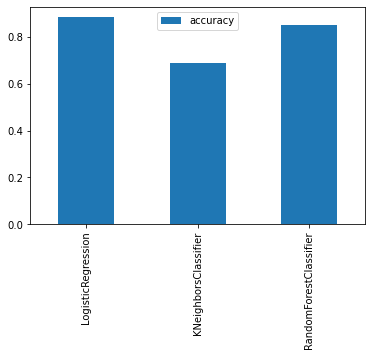

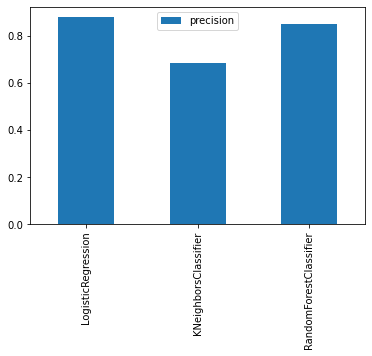

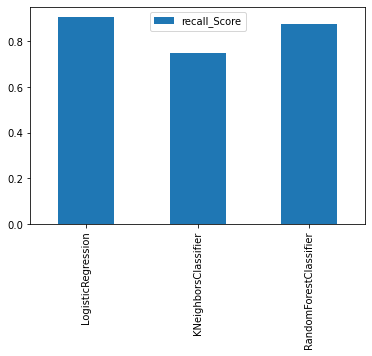

In [9]:
## importing all the basic tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## importing all the ml models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
## Model Evaluating tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay,plot_roc_curve
## setting random seed
np.random.seed(42)
dataset = pd.read_csv("heart-disease.csv")
##experimentation with our dataset to know more about it

x = dataset["target"].value_counts()
#x.plot(kind="bar",color=["Blue","Green"])

# dataset["cp"].value_counts()
# y = pd.crosstab(dataset.cp,dataset.target)
# y.plot(kind="bar",color=["Blue","Green"])
# plt.title("Graph")
# plt.xlabel("target")
# plt.ylabel("no. of people")
# plt.legend()
# plt.xticks()

# dataset.age.plot.hist();
# corrrelation_matrix = dataset.corr()
# fig,ax = plt.subplots(figsize=(15,10))
# ax = sns.heatmap(corrrelation_matrix,
#                 annot=True,
#                 linewidths = 0.5,
#                 fmt=".2f",
#                 cmap="YlGnBu")
# #setting upper and bottom limits of the heatmap
# bot,top = ax.get_ylim()
# ax.set_ylim(bot + 0.5,top -0.5)

## splitting our data into train and test sets
X = dataset.drop("target",axis=1)
y = dataset["target"]
## now we will be creating a function to use these models again and again 
model_dict = {"LogisticRegression":LogisticRegression(),
              "KNeighborsClassifier":KNeighborsClassifier(),
              "RandomForestClassifier":RandomForestClassifier()}
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
scoring_metrics = ["accuracy","precision","recall"]
def model_function(model,X_test,X_train,y_test,y_train):
    for key,classifier in model_dict.items():
        model_fit = classifier.fit(X_train,y_train)
        model_score = model_fit.score(X_test,y_test)
## Scoring using cross validation to get better results on accuracy,precision,recall use the following code
## instead of the code not commented
# np.random.seed(42)
# scoring_metrics = ["accuracy","precision","recall"]
# for key,classifier in model_dict.items():
#         model_fit = classifier.fit(X_train,y_train)
#         for metric in scoring_metrics:
#             model_cvs = cross_val_score(classifier,X,y,cv=5,scoring=metric)
#             model_score = np.mean(model_cvs)
#             print(f'Model:{key} -- {metric} Score = {model_score}')
        accuracy_dict[key] = model_score
        y_preds = classifier.predict(X_test)
        precision_dict[key] = precision_score(y_true=y_test, y_pred=y_preds)
        recall_dict[key] = recall_score(y_true=y_test, y_pred=y_preds)
        model_compare_acc = pd.DataFrame(accuracy_dict,index = ["accuracy"])
        model_compare_pre = pd.DataFrame(precision_dict,index = ["precision"])       
        model_compare_rec = pd.DataFrame(recall_dict,index = ["recall_Score"])
    yield model_compare_acc
    yield model_compare_pre
    yield model_compare_rec
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
for classifier in model_dict:
    method_call = model_function(model = classifier,
                                 X_test = X_test,
                                 X_train = X_train,
                                 y_test = y_test,
                                 y_train = y_train)
## Use the below code to print al the metrics ourside of the function
# for lim in range(len(model_dict)):
#     print(method_call.__next__())
## plotting our results
## use the below commented code in case if there is error in plotting graphs
# model_compare_acc = pd.DataFrame(accuracy_dict,index = ["accuracy"])
# model_compare_pre = pd.DataFrame(precision_dict,index = ["precision"])       
# model_compare_rec = pd.DataFrame(recall_dict,index = ["recall_Score"])
Print("This Result is on a single test set without using corss validation")
print(f'{model_compare_acc}\n {model_compare_pre}\n {model_compare_rec}')
acc_plot = model_compare_acc.T.plot.bar()
pre_plot = model_compare_pre.T.plot.bar()
recall_plot = model_compare_rec.T.plot.bar()




## Tuning our worst model i.e(KNN model)
### Result deduced from the graphs above
Using HyperParameter tuning 

0.7540983606557377

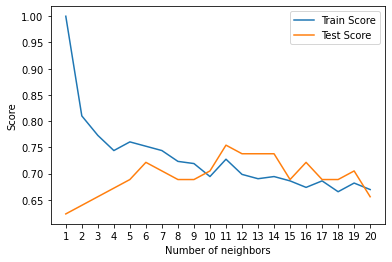

In [3]:
np.random.seed(42)
# instantaiting the model
training_scores = []
test_scores = []
knn_clf = KNeighborsClassifier()
# we are going to vary the n_neighbors param of the KNN model
for i in range(1,21):
    knn_clf.set_params(n_neighbors=i)
    knn_clf.fit(X_train,y_train)
    training_scores.append(knn_clf.score(X_train,y_train))
    test_scores.append(knn_clf.score(X_test,y_test))
training_scores
plt.plot(range(1,21),training_scores,label="Train Score")
plt.plot(range(1,21),test_scores,label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Score")
plt.legend()
plt.xticks(np.arange(1,21,1))
## using hyperparameters tuning we were able to bring out the knn model socre to 75% from 65%
max(test_scores)
## now we can conclude the knn is the worst among the above three models hence it should be discarded,beacuse even after
## HP tuning it scores less then Logistic Regression and Random Forest Classifier

## Tuning the remaining good models


## Now after this we can clearly see that Logistic Regression is better then RFC
Hence now we will tune Logistic Regression using Grid Search CV to narrow things down 


In [29]:
## Hyperparameter tuning using RSCV
# Creating a HP grid for Logistic Reg
np.random.seed(42)
LR_grid = {"C":np.logspace(-4, 4 ,20),
          "solver": ["liblinear"]}
# Creating a HP grid for RandomForestClassifier
Rfc_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}
#rs = random search
# rs_lr = RandomizedSearchCV(LogisticRegression(),
#                            param_distributions=LR_grid,
#                           cv=5,
#                           n_iter=20,
#                           verbose=True)
# rs_lr.fit(X_train,y_train)
# rs_lr.best_params_
best_params_fitted_lr = LogisticRegression(C=0.23357214690901212,
                                          solver='liblinear')
best_params_fitted_lr.fit(X_train,y_train)
result_of_LR_using_RSCV = best_params_fitted_lr.score(X_test,y_test)


# rs_RFC = RandomizedSearchCV(RandomForestClassifier(),
#                            param_distributions=Rfc_grid,
#                            cv=5,
#                            n_iter=20,
#                            verbose=True)
# rs_RFC.fit(X_train, y_train)
# rs_RFC.best_params_
best_params_fitted_rfc = RandomForestClassifier(n_estimators=610,
                                               min_samples_split=6,
                                               min_samples_leaf=13,
                                               max_depth=10)
best_params_fitted_rfc.fit(X_train,y_train)
result_of_RFC_using_RSCV = best_params_fitted_rfc.score(X_test,y_test)
print(f'Logisitic Regression Tuned using RSCV : {result_of_LR_using_RSCV}')
print(f'Random Forest Classifier Tuned using RSCV : {result_of_RFC_using_RSCV}')

Final score is 0.8479781420765027
Logisitic Regression Tuned using RSCV : 0.8852459016393442


In [19]:
# rs_RFC.best_params_
# Fitting 5 folds for each of 20 candidates, totalling 100 fits
# Fitting 5 folds for each of 20 candidates, totalling 100 fits
# Logisitic Regression Tuned using RSCV : 0.8852459016393442
# Random Forest Classifier Tuned using RSCV : 0.8688524590163934
gs_lr.best_params_
Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.8852459016393442

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [26]:
np.random.seed(42)
## Hyperparameter tuning using GSCV
# Creating a HP grid for Logistic Reg
LR_grid_gscv = {"C":np.logspace(-4, 4 ,30),
          "solver": ["liblinear"]}
# gs = grid search
# gs_lr = GridSearchCV(LogisticRegression(),
#                     param_grid=LR_grid_gscv,
#                     cv = 5,
#                     verbose=True
#                     )
# gs_lr.fit(X_train, y_train)
# gs_lr.best_params_
best_params_LR_using_GSCV = LogisticRegression(C=0.20433597178569418,
                                              solver='liblinear')
best_params_LR_using_GSCV.fit(X_train,y_train)
result_of_LR_using_GSCV = best_params_LR_using_GSCV.score(X_test,y_test)
print(f'Logisitic Regression Tuned using GSCV : {result_of_LR_using_GSCV}')


Logisitic Regression Tuned using GSCV : 0.8852459016393442


## Evaluating our tuned machine learning classifier beyond accuracy

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Final score is 0.8446994535519124


C:\Users\Neeraj Mathur\desktop\Project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Neeraj Mathur\desktop\Project1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


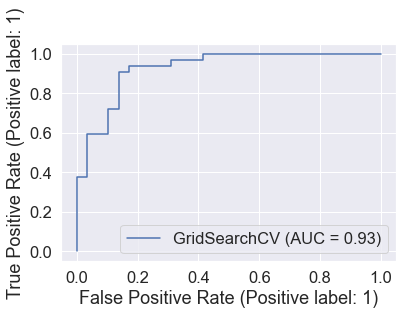

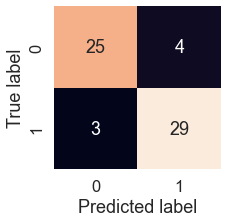

In [23]:
classifier = LogisticRegression()
model_fit = classifier.fit(X_train,y_train)
y_preds = classifier.predict(X_test)  

## Plot ROC Curve and finding the AUC metric
# AUC metric is generally written below the graph
plot_roc_curve(gs_lr,X_test,y_test)

## Confusion matrix
# seaborn heat map
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
  
plot_conf_mat(y_test, y_preds)


## Classification report
print(classification_report(y_test,y_preds))

## Calculating evaluation metric using cross validation and the best hyperparameters which we found
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")


acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
score = np.mean(acc)
print(f'Final score is {score}')

## Calculating evaluation metric using cross validation and the best hyperparameters which we found


acc_score:0.8446994535519124
 pre_score:0.8207936507936507
 recall_score:0.9212121212121213
 f1_score:0.8673007976269721


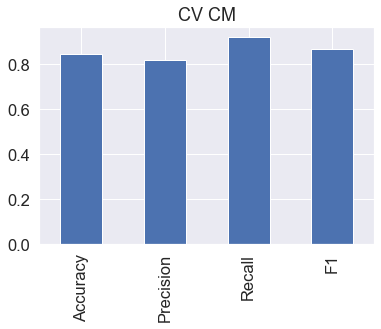

In [25]:
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

np.random.seed(42)
acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
acc_score = np.mean(acc)
pre = cross_val_score(clf, X, y, cv=5, scoring="precision")
pre_score = np.mean(pre)
recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
recall_score = np.mean(recall)
f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
f1_score = np.mean(f1)
print(f'acc_score:{acc_score}\n pre_score:{pre_score}\n recall_score:{recall_score}\n f1_score:{f1_score}')

## Visualizing our cross validated metrics

cv_metrics = pd.DataFrame({"Accuracy":acc_score,
                          "Precision":pre_score,
                          "Recall":recall_score,
                          "F1":f1_score},
                         index=[0])
cv_metrics.T.plot.bar(title="CV CM",
                     legend=False);

In [136]:
import sklearn
sklearn.__version__

'1.1.1'

## Feature Importance
Feature importance of Logisitic Regression,Its different for every model


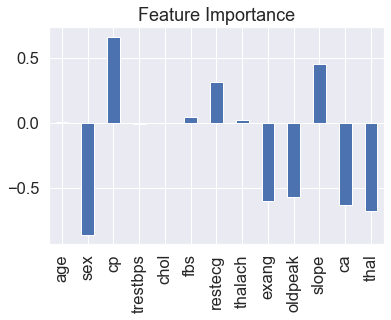

In [26]:
gs_lr.best_params_
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(X_train,y_train)
# coefs means how each feature is dependent witht the label,how much each of the column contribute in predicting the target
clf.coef_
# combining coef and columns(binding)
feature_dict = dict(zip(dataset.columns, list(clf.coef_[0])))
feature_dict
# plotting 
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

### As our result is not going up more than 85% accuracy on Logistic Regression model we must ask for more data to improve our model, With more Experimentation i guess we can get more accuracy
